# Predict NYC Airbnb rental price

<h2>Task</h2>
    <p>The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external dataset(s) with relevant information. As of August 2019, this data set contains almost 50 thousand airbnb listings in NYC.</p>

## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
print(df.columns.tolist())

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.drop(["name","host_name","last_review"], axis=1, inplace=True)

In [9]:
df[df["reviews_per_month"].isnull()]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
19,7750,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
26,8700,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
36,11452,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365
38,11943,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [10]:
df["reviews_per_month"].fillna(0,inplace=True)

In [11]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [13]:
df.groupby("neighbourhood_group")["price"].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [14]:
df["neighbourhood"].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [15]:
len(df["neighbourhood"].unique())

221

In [16]:
ngs = df["neighbourhood_group"].unique()

In [17]:
for ng in ngs:
    print(ng)
    temp = df[df["neighbourhood_group"] == ng]
    print(temp.groupby("neighbourhood")["price"].mean().head())
    print("--------------------------------------------")

Brooklyn
neighbourhood
Bath Beach             81.764706
Bay Ridge             144.432624
Bedford-Stuyvesant    107.678244
Bensonhurst            75.786667
Bergen Beach          106.700000
Name: price, dtype: float64
--------------------------------------------
Manhattan
neighbourhood
Battery Park City    367.557143
Chelsea              249.738544
Chinatown            161.497283
Civic Center         191.942308
East Harlem          133.198747
Name: price, dtype: float64
--------------------------------------------
Queens
neighbourhood
Arverne        171.779221
Astoria        117.187778
Bay Terrace    142.000000
Bayside        157.948718
Bayswater       87.470588
Name: price, dtype: float64
--------------------------------------------
Staten Island
neighbourhood
Arden Heights                  67.250000
Arrochar                      115.000000
Bay Terrace, Staten Island    102.500000
Bull's Head                    47.333333
Castleton Corners             139.750000
Name: price, dtype: float

In [18]:
df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

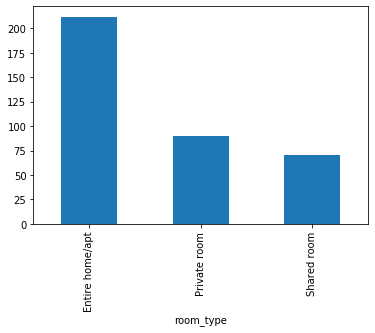

In [19]:
df.groupby("room_type")["price"].mean().plot(kind="bar")

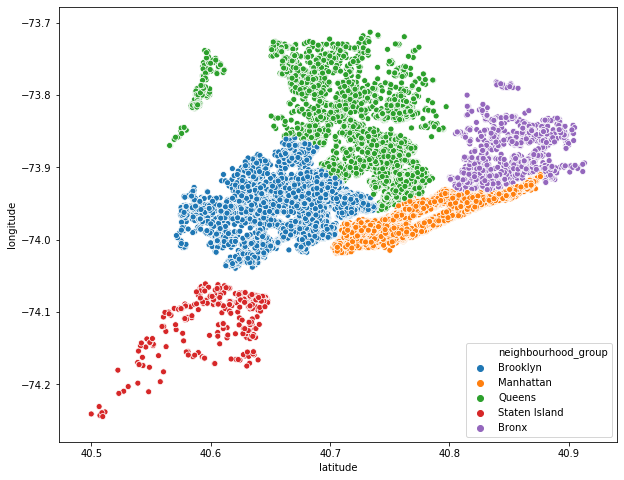

In [20]:
# Numerical columns
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="latitude", y="longitude", hue="neighbourhood_group")
plt.show()

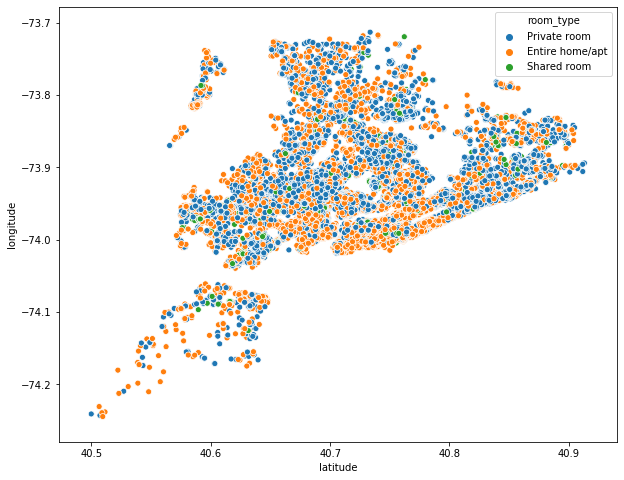

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="latitude", y="longitude", hue="room_type")
plt.show()

In [22]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [23]:
len(df[df["price"] == 0])

11

In [24]:
len(df[df["availability_365"] == 0])

17533

In [25]:
df = df[df["price"] > 0]

df = df[df["availability_365"] > 0]

In [26]:
len(df[df["price"] == 0])
len(df[df["availability_365"] == 0])

0

In [27]:
df_num = df.select_dtypes(["int64","float64"])

In [28]:
df_num.drop(["id","host_id","calculated_host_listings_count"],axis=1,inplace=True)

In [29]:
df_num.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,40.64749,-73.97237,149,1,9,0.21,365
1,40.75362,-73.98377,225,1,45,0.38,355
2,40.80902,-73.94190,150,3,0,0.00,365
3,40.68514,-73.95976,89,1,270,4.64,194
5,40.74767,-73.97500,200,3,74,0.59,129


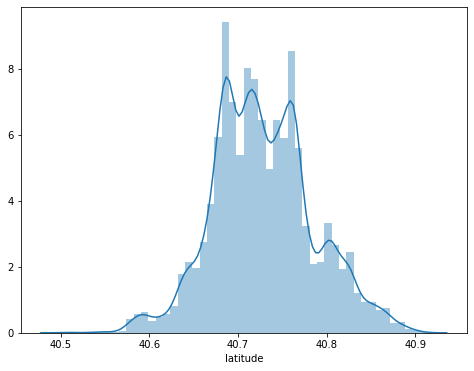

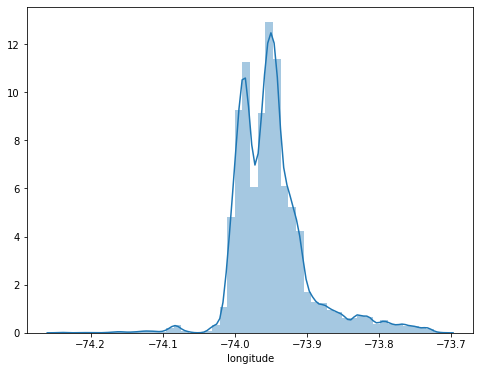

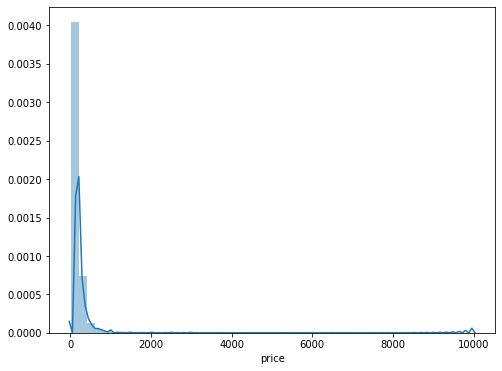

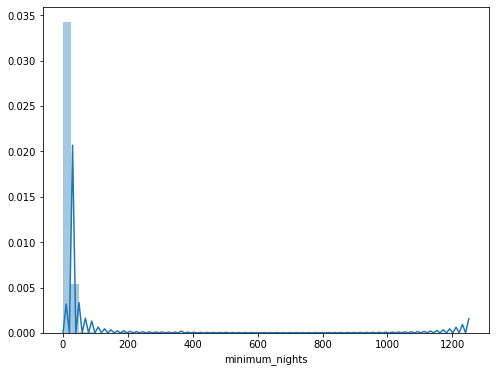

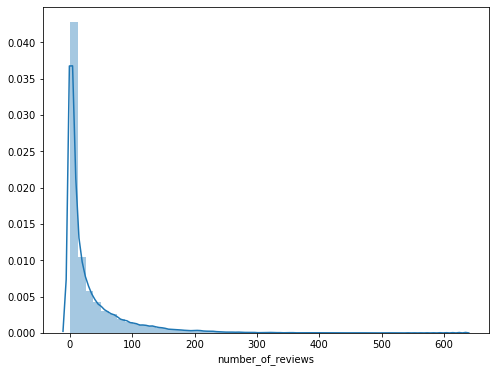

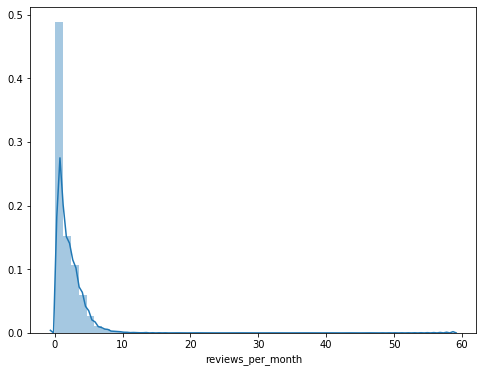

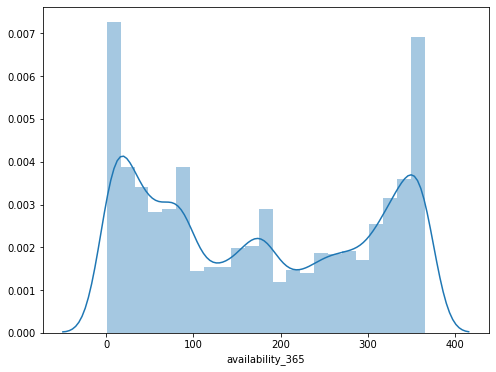

In [30]:
# Plotting distplot on entire numerical data columns to check distribution

for col in df_num:
    plt.figure(figsize=(8,6))
    sns.distplot(df_num[col])
    plt.show()

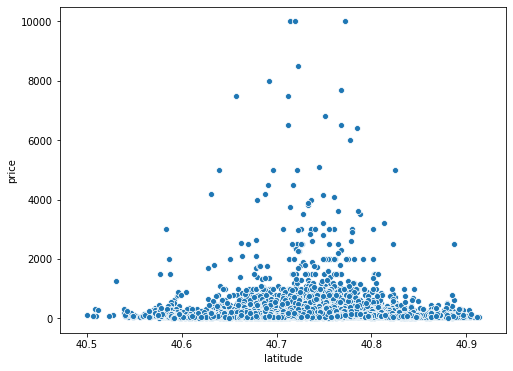

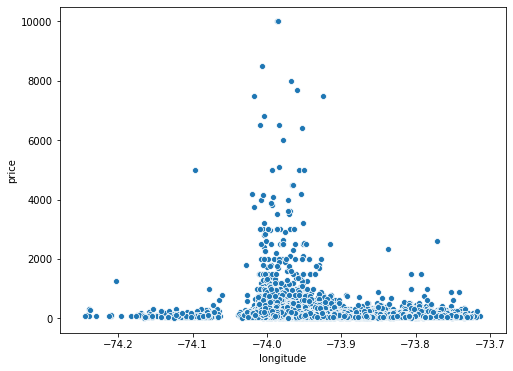

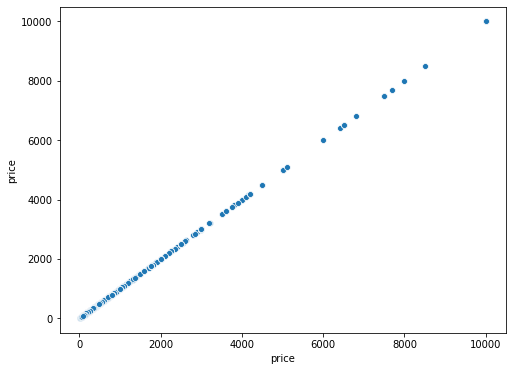

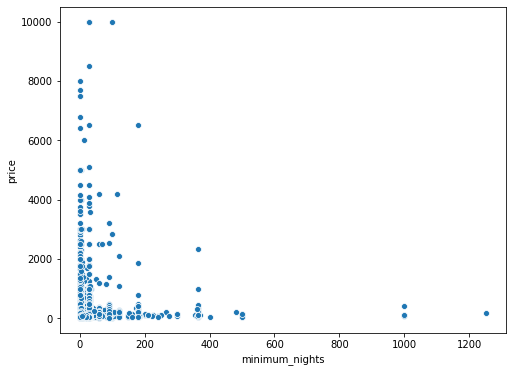

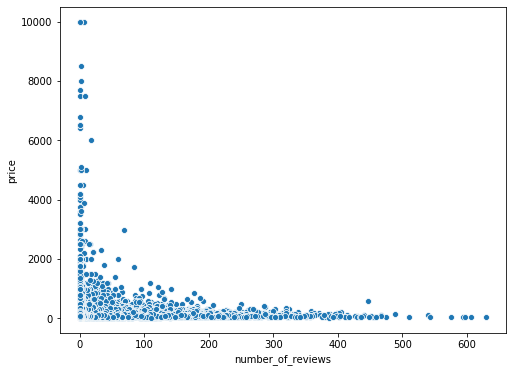

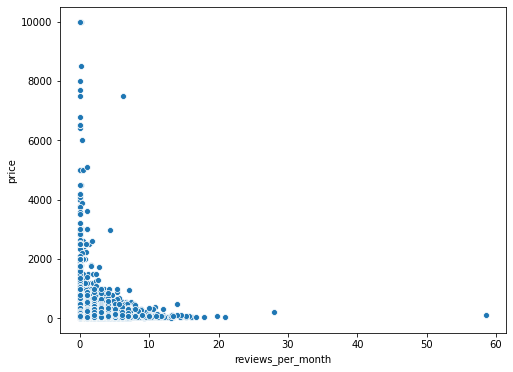

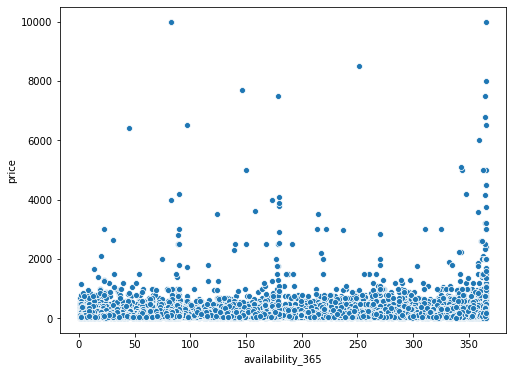

In [31]:
# Plotting scatterplot on numerical data to check linearity between price and other columns of numerical data.
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_num, x=col, y="price")
    plt.show()

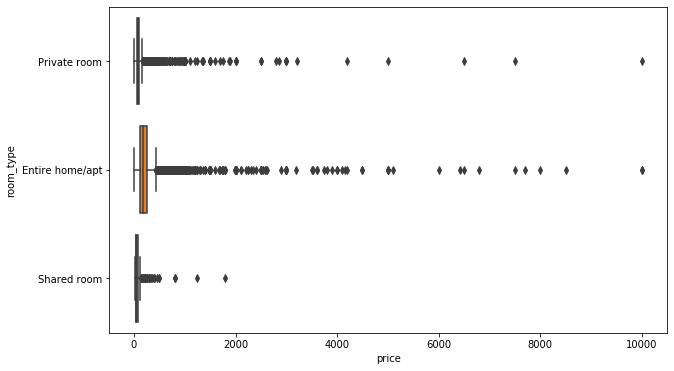

In [32]:
# Plotting boxplot on main dataframe for checking outliers betwwen price and one categorical column
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="price", y="room_type")
plt.show()

In [33]:
np.sort(df_num["price"].unique())

array([   10,    11,    12,    13,    15,    16,    19,    20,    21,
          22,    23,    24,    25,    26,    27,    28,    29,    30,
          31,    32,    33,    34,    35,    36,    37,    38,    39,
          40,    41,    42,    43,    44,    45,    46,    47,    48,
          49,    50,    51,    52,    53,    54,    55,    56,    57,
          58,    59,    60,    61,    62,    63,    64,    65,    66,
          67,    68,    69,    70,    71,    72,    73,    74,    75,
          76,    77,    78,    79,    80,    81,    82,    83,    84,
          85,    86,    87,    88,    89,    90,    91,    92,    93,
          94,    95,    96,    97,    98,    99,   100,   101,   102,
         103,   104,   105,   106,   107,   108,   109,   110,   111,
         112,   113,   114,   115,   116,   117,   118,   119,   120,
         121,   122,   123,   124,   125,   126,   127,   128,   129,
         130,   131,   132,   133,   134,   135,   136,   137,   138,
         139,   140,

In [34]:
pd.Series(pd.cut(df_num["price"],50)).value_counts(sort=False)

(0.01, 209.8]        25325
(209.8, 409.6]        4645
(409.6, 609.4]         768
(609.4, 809.2]         299
(809.2, 1009.0]        146
(1009.0, 1208.8]        33
(1208.8, 1408.6]        17
(1408.6, 1608.4]        22
(1608.4, 1808.2]        12
(1808.2, 2008.0]        17
(2008.0, 2207.8]         4
(2207.8, 2407.6]         5
(2407.6, 2607.4]        12
(2607.4, 2807.2]         2
(2807.2, 3007.0]        12
(3007.0, 3206.8]         1
(3206.8, 3406.6]         1
(3406.6, 3606.4]         3
(3606.4, 3806.2]         3
(3806.2, 4006.0]         3
(4006.0, 4205.8]         4
(4205.8, 4405.6]         0
(4405.6, 4605.4]         2
(4605.4, 4805.2]         0
(4805.2, 5005.0]         4
(5005.0, 5204.8]         1
(5204.8, 5404.6]         0
(5404.6, 5604.4]         0
(5604.4, 5804.2]         0
(5804.2, 6004.0]         1
(6004.0, 6203.8]         0
(6203.8, 6403.6]         0
(6403.6, 6603.4]         3
(6603.4, 6803.2]         1
(6803.2, 7003.0]         0
(7003.0, 7202.8]         0
(7202.8, 7402.6]         0
(

In [35]:
def price_to_cat(x):
    if x <= 200:
        return "0-200"
    elif x <= 1000:
        return "200-1000"
    else:
        return "1000>"

In [36]:
df["price_cat"] = df["price"].map(price_to_cat)

In [37]:
df["price_cat"].value_counts()

0-200       25185
200-1000     5997
1000>         172
Name: price_cat, dtype: int64

In [38]:
df_cat = df.select_dtypes(["object"])

In [39]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type,price_cat
0,Brooklyn,Kensington,Private room,0-200
1,Manhattan,Midtown,Entire home/apt,200-1000
2,Manhattan,Harlem,Private room,0-200
3,Brooklyn,Clinton Hill,Entire home/apt,0-200
5,Manhattan,Murray Hill,Entire home/apt,0-200


In [40]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [41]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type,price_cat
0,1,107,1,0
1,2,126,0,2
2,2,93,1,0
3,1,40,0,0
5,2,136,0,0


In [42]:
df_new = pd.concat([df_num,df_cat], axis=1)

In [43]:
df_new.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,neighbourhood_group,neighbourhood,room_type,price_cat
0,40.64749,-73.97237,149,1,9,0.21,365,1,107,1,0
1,40.75362,-73.98377,225,1,45,0.38,355,2,126,0,2
2,40.80902,-73.94190,150,3,0,0.00,365,2,93,1,0
3,40.68514,-73.95976,89,1,270,4.64,194,1,40,0,0
5,40.74767,-73.97500,200,3,74,0.59,129,2,136,0,0


In [44]:
df_new.drop("price", axis=1, inplace=True)

In [45]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Baseline Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [48]:
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [49]:
# Logistic Regression
log = LogisticRegression()

In [50]:
create_model(log)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7565
           1       0.00      0.00      0.00        35
           2       0.51      0.11      0.18      1807

    accuracy                           0.81      9407
   macro avg       0.44      0.36      0.36      9407
weighted avg       0.76      0.81      0.75      9407



LogisticRegression()

In [51]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()

In [53]:
create_model(dt)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7565
           1       0.07      0.11      0.08        35
           2       0.49      0.49      0.49      1807

    accuracy                           0.80      9407
   macro avg       0.48      0.49      0.48      9407
weighted avg       0.80      0.80      0.80      9407



DecisionTreeClassifier()

In [54]:
dt2 = DecisionTreeClassifier(max_depth=8)
create_model(dt2)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7565
           1       0.20      0.03      0.05        35
           2       0.58      0.48      0.53      1807

    accuracy                           0.83      9407
   macro avg       0.55      0.48      0.49      9407
weighted avg       0.82      0.83      0.82      9407



DecisionTreeClassifier(max_depth=8)

In [55]:
dt3 = DecisionTreeClassifier(min_samples_leaf=50)
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7565
           1       0.00      0.00      0.00        35
           2       0.60      0.46      0.52      1807

    accuracy                           0.83      9407
   macro avg       0.49      0.46      0.47      9407
weighted avg       0.82      0.83      0.83      9407



# Random Oversampling

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
ros = RandomOverSampler(random_state=1)

In [58]:
X_sample , y_sample = ros.fit_sample(X_train,y_train)

In [59]:
pd.Series(y_sample).value_counts()

2    17620
1    17620
0    17620
Name: price_cat, dtype: int64

In [60]:
def create_oversample_model(model):
    model.fit(X_sample,y_sample)
    y_pred1 = model.predict(X_test)
    print(classification_report(y_test,y_pred1))
    print("-----------------------------------------------------------")
    print("Accuracy score is: ", accuracy_score(y_test,y_pred1))
    
    return model

## Logistic Regression

In [61]:
log1 = LogisticRegression()
create_oversample_model(log1)

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      7565
           1       0.01      0.83      0.03        35
           2       0.36      0.42      0.39      1807

    accuracy                           0.59      9407
   macro avg       0.44      0.63      0.39      9407
weighted avg       0.83      0.59      0.68      9407

-----------------------------------------------------------
Accuracy score is:  0.5863718507494419


LogisticRegression()

## Decision Tree Classifier

In [62]:
dt4 = DecisionTreeClassifier()
create_oversample_model(dt4)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7565
           1       0.11      0.17      0.13        35
           2       0.49      0.48      0.48      1807

    accuracy                           0.80      9407
   macro avg       0.49      0.51      0.50      9407
weighted avg       0.80      0.80      0.80      9407

-----------------------------------------------------------
Accuracy score is:  0.7997236100776017


DecisionTreeClassifier()

In [63]:
dt5 = DecisionTreeClassifier(max_depth=8)
create_oversample_model(dt5)

              precision    recall  f1-score   support

           0       0.95      0.68      0.79      7565
           1       0.03      0.63      0.05        35
           2       0.40      0.70      0.51      1807

    accuracy                           0.68      9407
   macro avg       0.46      0.67      0.45      9407
weighted avg       0.84      0.68      0.73      9407

-----------------------------------------------------------
Accuracy score is:  0.6808759434463697


DecisionTreeClassifier(max_depth=8)

In [64]:
dt6 = DecisionTreeClassifier(criterion="entropy")
create_oversample_model(dt6)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7565
           1       0.13      0.23      0.16        35
           2       0.48      0.48      0.48      1807

    accuracy                           0.80      9407
   macro avg       0.50      0.53      0.51      9407
weighted avg       0.80      0.80      0.80      9407

-----------------------------------------------------------
Accuracy score is:  0.7988731795471458


DecisionTreeClassifier(criterion='entropy')

## XGBoost Classifier

In [65]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200,reg_alpha=1)
create_oversample_model(xgb)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7565
           1       0.18      0.14      0.16        35
           2       0.53      0.68      0.59      1807

    accuracy                           0.82      9407
   macro avg       0.54      0.56      0.55      9407
weighted avg       0.84      0.82      0.83      9407

-----------------------------------------------------------
Accuracy score is:  0.8186456893802487


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## ADA Boost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
create_oversample_model(ada)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      7565
           1       0.02      0.63      0.05        35
           2       0.43      0.61      0.50      1807

    accuracy                           0.71      9407
   macro avg       0.46      0.66      0.46      9407
weighted avg       0.84      0.71      0.76      9407

-----------------------------------------------------------
Accuracy score is:  0.7128733921547784


AdaBoostClassifier(n_estimators=100)

## Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
create_oversample_model(rfc)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      7565
           1       0.33      0.11      0.17        35
           2       0.60      0.59      0.59      1807

    accuracy                           0.84      9407
   macro avg       0.61      0.54      0.56      9407
weighted avg       0.84      0.84      0.84      9407

-----------------------------------------------------------
Accuracy score is:  0.844371212926544


RandomForestClassifier()

In [68]:
rfc1 = RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=1)
create_oversample_model(rfc1)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      7565
           1       0.38      0.14      0.21        35
           2       0.59      0.57      0.58      1807

    accuracy                           0.84      9407
   macro avg       0.62      0.54      0.56      9407
weighted avg       0.84      0.84      0.84      9407

-----------------------------------------------------------
Accuracy score is:  0.8393749335601148


RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=1)

# Support Vector Classifier

In [69]:
from sklearn.svm import SVC
svc_classifier = SVC()
create_oversample_model(svc_classifier)

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      7565
           1       0.01      0.74      0.02        35
           2       0.27      0.32      0.30      1807

    accuracy                           0.52      9407
   macro avg       0.38      0.55      0.34      9407
weighted avg       0.75      0.52      0.61      9407

-----------------------------------------------------------
Accuracy score is:  0.5246093334750718


SVC()

In [70]:
# Random Forest Classifier giving us best accuracy score than other classifiers i.e 84% accuracy